In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#монтируем Google диск 
from google.colab import drive
drive.mount ('/content/drive') 

Mounted at /content/drive


In [ ]:
Z = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMM-ML-2023/task-6/texts_train.csv", sep=";")

In [ ]:
Z.head(5)

,tid,tdate,tname,ttext,ttype,trep,tfav,tstcount,tfol,tfrien,listcount,noname
0,408906692374446080,1386325927,pleease_shut_up,"@first_timee хоть я и школота, но поверь, у на...",1,0,0,0,7569,62,61,0
1,408906692693221377,1386325927,alinakirpicheva,"Да, все-таки он немного похож на него. Но мой ...",1,0,0,0,11825,59,31,2
2,408906695083954177,1386325927,EvgeshaRe,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,0,1,0,1273,26,27,0
3,408906695356973056,1386325927,ikonnikova_21,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,0,1,0,1549,19,17,0
4,408906761416867842,1386325943,JumpyAlex,@irina_dyshkant Вот что значит страшилка :D\r\...,1,0,0,0,597,16,23,1


    – id: уникальный номер сообщения в системе twitter;
    – tdate: дата публикации сообщения (твита);
    – tmane: имя пользователя, опубликовавшего сообщение;
    – ttext:  текст сообщения (твита);
    – ttype: поле в котором в дальнейшем будет указано к кому классу относится твит (положительный, отрицательный);
    – trep: количество реплаев к данному сообщению. В настоящий момент API твиттера не отдает эту информацию;
    – tfav: число сколько раз данное сообщение было добавлено в избранное другими пользователями;
    – tstcount: число всех сообщений пользователя в сети twitter;
    – tfol: количество фоловеров пользователя (тех людей, которые читают пользователя);
    – tfrien: количество друзей пользователя (те люди, которых читает пользователь);
    – listcount: количество листов-подписок в которые добавлен твиттер-пользователь.

In [ ]:
Z["ttext"].count()

3145

In [ ]:
Z.ttype.unique()

array([ 1, -1])

In [ ]:
# Целевая переменная
y=Z["ttype"]

In [ ]:
# Смотрим только тексты твитов
X=pd.DataFrame(Z['ttext'])

In [ ]:
X

,ttext
0,"@first_timee хоть я и школота, но поверь, у на..."
1,"Да, все-таки он немного похож на него. Но мой ..."
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...
3,"RT @digger2912: ""Кто то в углу сидит и погибае..."
4,@irina_dyshkant Вот что значит страшилка :D\r\...
...,...
3140,RT @biathlonrus: Максим Чудов объявил о заверш...
3141,Два года... Нееет.. Я не хочу его отпускать......
3142,Домоооой хочу....никто и не представляет наско...
3143,Сегодня самая короткая ночь. Завтра начинается...


In [ ]:
# from nltk.tokenize import word_tokenize

# 

# Обработка текстов

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#обычно загрузка происходит один раз скачиваются файлы, далее они остаются на компьютере
#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('russian')
stemmer = nltk.stem.snowball.RussianStemmer('russian')

In [ ]:
# Вывод списка стоп слов на русском
print (' '.join(stopwords.words('russian')[:20]))

и в во не что он на я с со как а то все она так его но да ты


In [ ]:
# Обертка для визуализции ожидания обработки
import tqdm

In [ ]:
# Функция обработки текста 
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    #regex = re.compile('[^a-z A-Z]')
    regex = re.compile('[^а-я А-Я]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
    #for i in  range(len(texts)):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        preprocess_texts.append( ' '.join(filtered_sentence))
    
    return preprocess_texts

In [ ]:
def stemming_texts(texts):
    st = nltk.stem.snowball.RussianStemmer('russian')
    stem_text = []
    for text in tqdm.tqdm(texts):
        word_tokens = word_tokenize(text)
        stem_text.append(' '.join([st.stem(word) for word in word_tokens]))
    return stem_text

In [ ]:
X['ttext'] = preprocess_text(X['ttext'])

100%|██████████| 3145/3145 [00:00<00:00, 4079.70it/s]


In [ ]:
X['ttext'] = stemming_texts(X['ttext'])

100%|██████████| 3145/3145 [00:03<00:00, 976.07it/s] 


In [ ]:
X.head()

,ttext
0,хоть я и школот но повер у нас то же сам общес...
1,да все так он немн похож на него но мой мальчи...
2,ну ты идиотк я испуга за тебя
3,кто то в угл сид и погиба от голод а мы ещ пор...
4,вот что знач страшилк но блин посмотр все част...


In [ ]:
#def data_Stemmer(text):
#    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [ ]:
#X.ttext = X.ttext.apply(lambda x: x.lower().replace('unknown', ''))

In [ ]:
#X.ttext = X.ttext.apply(lambda x: data_Stemmer(x.lower().replace('unknown', '')))

In [ ]:
#X.head()

In [ ]:
X=X.ttext

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [ ]:
#Разбиваем на тестовую и обучающие выборки
from sklearn.model_selection import train_test_split
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)

In [ ]:
Xtr_tfidf.shape, Xval_tfidf.shape

((2201, 1161), (944, 1161))

## Методы логистической регрессии к нашим данным

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=500, 
    penalty='l2', 
    random_state=42
)

In [ ]:
logit_sgd.fit(Xtr_tfidf, ytr)

print("train accuracy=", accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print("validation accuracy=",accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

train accuracy= 0.9377555656519764
validation accuracy= 0.5953389830508474
              precision    recall  f1-score   support

          -1       0.52      0.53      0.53       402
           1       0.65      0.64      0.64       542

    accuracy                           0.60       944
   macro avg       0.59      0.59      0.59       944
weighted avg       0.60      0.60      0.60       944



In [ ]:
logit_cv = LogisticRegressionCV(Cs=10, n_jobs=-1)
logit_cv.fit(Xtr_tfidf, ytr)

LogisticRegressionCV(n_jobs=-1)

In [ ]:
print("train accuracy=", accuracy_score(logit_cv.predict(Xtr_tfidf), ytr))
print("validation accuracy=", accuracy_score(logit_cv.predict(Xval_tfidf), yval))

print(classification_report(logit_cv.predict(Xval_tfidf), yval))

train accuracy= 0.8119036801453885
validation accuracy= 0.6472457627118644
              precision    recall  f1-score   support

          -1       0.51      0.61      0.56       339
           1       0.75      0.67      0.71       605

    accuracy                           0.65       944
   macro avg       0.63      0.64      0.63       944
weighted avg       0.67      0.65      0.65       944



In [ ]:
def visualize_coefficients(coef, feature_names, title, plot_num, n_top_features=25):
    interesting_coefficients = np.argsort(coef)[-n_top_features:]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

In [ ]:
logit_cv.coef_

array([[ 0.05036008,  0.04264806, -0.05136862, ..., -0.04426357,
         0.04125593,  0.04386721]])

In [ ]:
tf_vectorizer.get_feature_names_out

## Графики значимости слов для попадания в разные классы

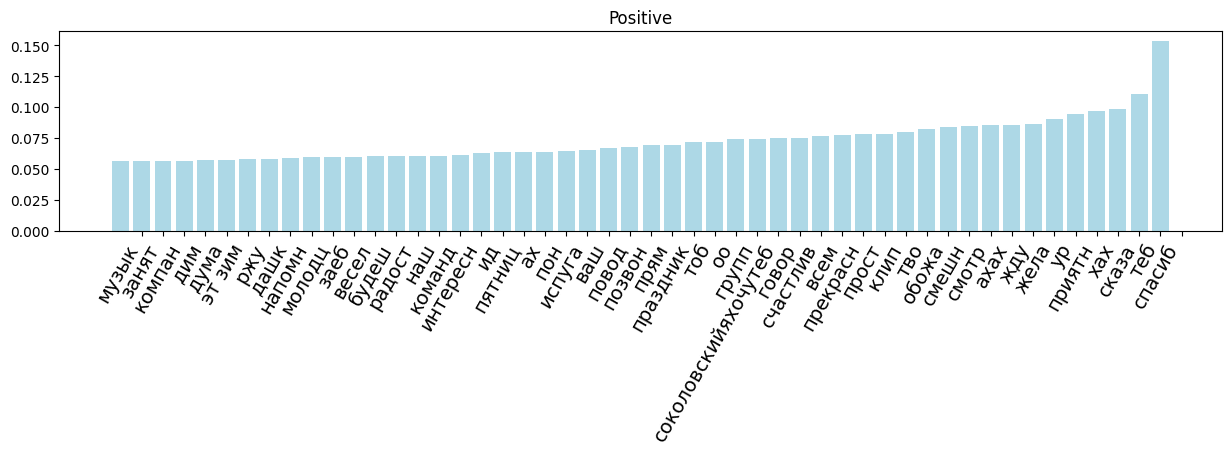

In [ ]:
visualize_coefficients(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names_out(),title="Positive", plot_num=0, n_top_features=50)

In [ ]:
def visualize_coefficients_2(coef, feature_names, title, plot_num, n_top_features=50):
    interesting_coefficients = np.argsort(coef)[0:n_top_features]
    
    plt.figure(figsize=(15, 15))
    plt.subplot(510+plot_num+1)
    colors = ["lightblue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + n_top_features), 
               feature_names[interesting_coefficients], rotation=60, ha="right", fontsize=14);
    plt.title(title)

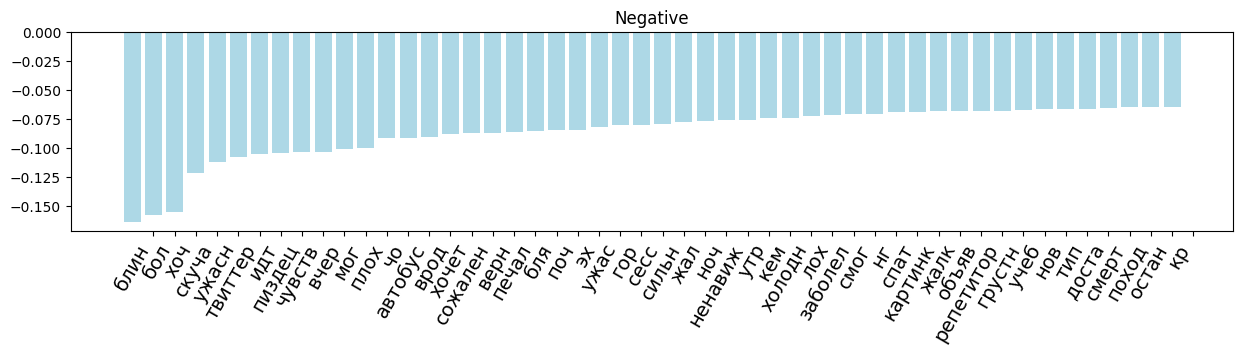

In [ ]:
visualize_coefficients_2(logit_cv.coef_[0,:], tf_vectorizer.get_feature_names_out(),title="Negative", plot_num=1, n_top_features=50)